# PRISMA Flow Diagram

In [18]:
from msc_code.scripts.notebook_setup import *

In [19]:
title_abstract_review = pd.read_csv("/".join([PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_FINAL.csv"]))
google_scholar_title_abstract_review = title_abstract_review[title_abstract_review['Database'] == 'Google Scholar']
database_title_abstract_review = title_abstract_review[title_abstract_review['Database'] != 'Google Scholar']

### Identification of studies via databases and registers

#### Identification

In [ ]:
# Import database search initial results.
database_search_results_initial = pd.read_csv('/'.join([PROC_DATA_DIR, "database_search", "database_search_results_initial.csv"]))
# Count number of results for each database
database_counts_initial = database_search_results_initial['Database'].value_counts()


,Unnamed: 0,Publication Year,First Author,Authors,Publication Title,Title,Abstract,DOI,Database
0,0,1975,"Davidoff, E.","Davidoff, Elliott; Towne, Jonathan B.",New York State Journal Of Medicine,Ingested foreign bodies,Discusses 7 case histories of White male feder...,NaN,PsycINFO
1,4,1989,"Friedman, E.","Friedman, E. M.",Pediatric Clinics Of North America,Caustic ingestions and foreign bodies in the a...,"Caustic ingestions, both accidental and intent...",10.1016/s0031-3955(16)36796-7,PubMed
2,9,1991,"Brusis, T.","Brusis, T.; Luckhaupt, H.",Laryngo- Rhino- Otologie,History of esophagoscopy,Since the middle of the 19th century very many...,10.1055/s-2007-997999,PubMed
3,12,1994,"Scharman, E.","Scharman, E. J.; Lembersky, R.; Krenzelok, E. P.",American Journal Of Emergency Medicine,Efficiency of whole bowel irrigation with and ...,Whole bowel irrigation (WBI) with a polyethyle...,10.1016/0735-6757(94)90144-9,PubMed
4,16,1996,"Leder, S.","Leder, S. B.",Head & Neck,Gag reflex and dysphagia,BACKGROUND: The gag reflex is a protective res...,10.1002/(sici)1097-0347(199603/04)18:2<138::ai...,PubMed
...,...,...,...,...,...,...,...,...,...
355,659,2024,"Stratton, H.","Stratton H.S., Davis R., Lewbart G.A.",Veterinary Record Case Reports,Gastrotomy for removal of a gastric fishhook f...,An adult blue catfish (Ictalurus furcatus) pre...,10.1002/vrc2.918,Embase
356,661,2024,"Sultan, N.","Sultan, Noran; Attar, Hanin; Sembawa, Hatem; A...",International Journal Of Surgery Case Reports,A plastic bezoar causing bowel obstruction: a ...,INTRODUCTION AND IMPORTANCE: A bezoar is an in...,10.1016/j.ijscr.2024.109506,PubMed
357,664,2024,"Vikash, F.","Vikash, Fnu; Osayande, Osagiede; Pang, Maoyin",Acg Case Reports Journal,Tracheal stent ingestion: unveiling complicati...,Airway stenting has become integral to the the...,10.14309/crj.0000000000001404,PubMed
358,667,2024,"Wu, L.","Wu, Lei; Chen, Xiao-Yu; Ji, Dan; Zhang, Zhi-Gu...",Abdominal Radiology (New York),Foreign body-intestinal canal angle guides man...,BACKGROUND: Determining whether prompt surgery...,10.1007/s00261-024-04404-7,PubMed


In [21]:
# Import data on how many duplicates were removed during title and abstract screening
database_search_results_duplicates = pd.read_csv("/".join([PROC_DATA_DIR, "database_search", "database_search_results_duplicates.csv"]))
database_search_duplicate_count = len(database_search_results_duplicates)

In [22]:
# Create dataframe of other pre-screening removal reasons.
database_pre_screen_removal_reasoning = pd.DataFrame({
    "Reason": [
        "Duplicates Removed",
        "Records marked as ineligible\nby automation tools",    # Records marked as ineligible by automation tools = 0
        "Records removed for other\nreasons"                    # Records marked as ineligible for other reasons = 0
    ],
    "Count": [database_search_duplicate_count, 0, 0]  # Or fill in the real count if you have it
})

# Calculate number of records excluded during title and abstract screening.
title_abstract_review_exclusion_count = len(title_abstract_review[title_abstract_review['Exclude_FINAL'] != False])

In [23]:
# Calculate number of records excluded from database searches during title and abstract review
database_title_abstract_review["Exclusion_Reason_Text"] = database_title_abstract_review["Reason_ID_Final"].map(exclusion_criteria_short)
database_title_abstract_review_exclusion_reasoning = database_title_abstract_review["Exclusion_Reason_Text"].value_counts()
database_title_abstract_review_exclusion_reasoning

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_70037/1511740613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database_title_abstract_review["Exclusion_Reason_Text"] = database_title_abstract_review["Reason_ID_Final"].map(exclusion_criteria_short)


Exclusion_Reason_Text
Studies not focusing on intentional self-ingestion.                                       50
Studies focusing on ingestion or co-ingestion of substances.                              13
Studies focussing solely on accidental ingestion.                                         12
Non-Human/ animal studies.                                                                12
Reviews, editorials, commentaries, and opinion pieces without original empirical data.     4
Full text not available in English.                                                        1
Ingestions undertaken in controlled environment as part of voluntary study.                1
Name: count, dtype: int64

### Identification of studies by other methods

#### Identification

In [24]:
# Import google_scholar query results.
google_df = pd.read_csv("/".join([RAW_DATA_DIR, "google_scholar", "google_scholar_results_2.csv"]))

# Create dataframe to store counts of studies identified by other methods
other_methods_results_counts = pd.DataFrame([{
    "Source": "Google Scholar",
    "Count": len(google_df)
}])

## TODO
citation_search_count = pd.DataFrame([{
    "Source": "Bibliography Search",
    "Count": 0 # Update later
}])

# Concatinate citation search count with other methods results counts
other_methods_results_counts = pd.concat([other_methods_results_counts, citation_search_count], ignore_index=True)
# Sort values by count ascending
other_methods_results_counts = other_methods_results_counts.sort_values(by='Count', ascending=False)
# Display 
other_methods_results_counts

,Source,Count
0,Google Scholar,135
1,Bibliography Search,0


## PRISMA Diagram Function

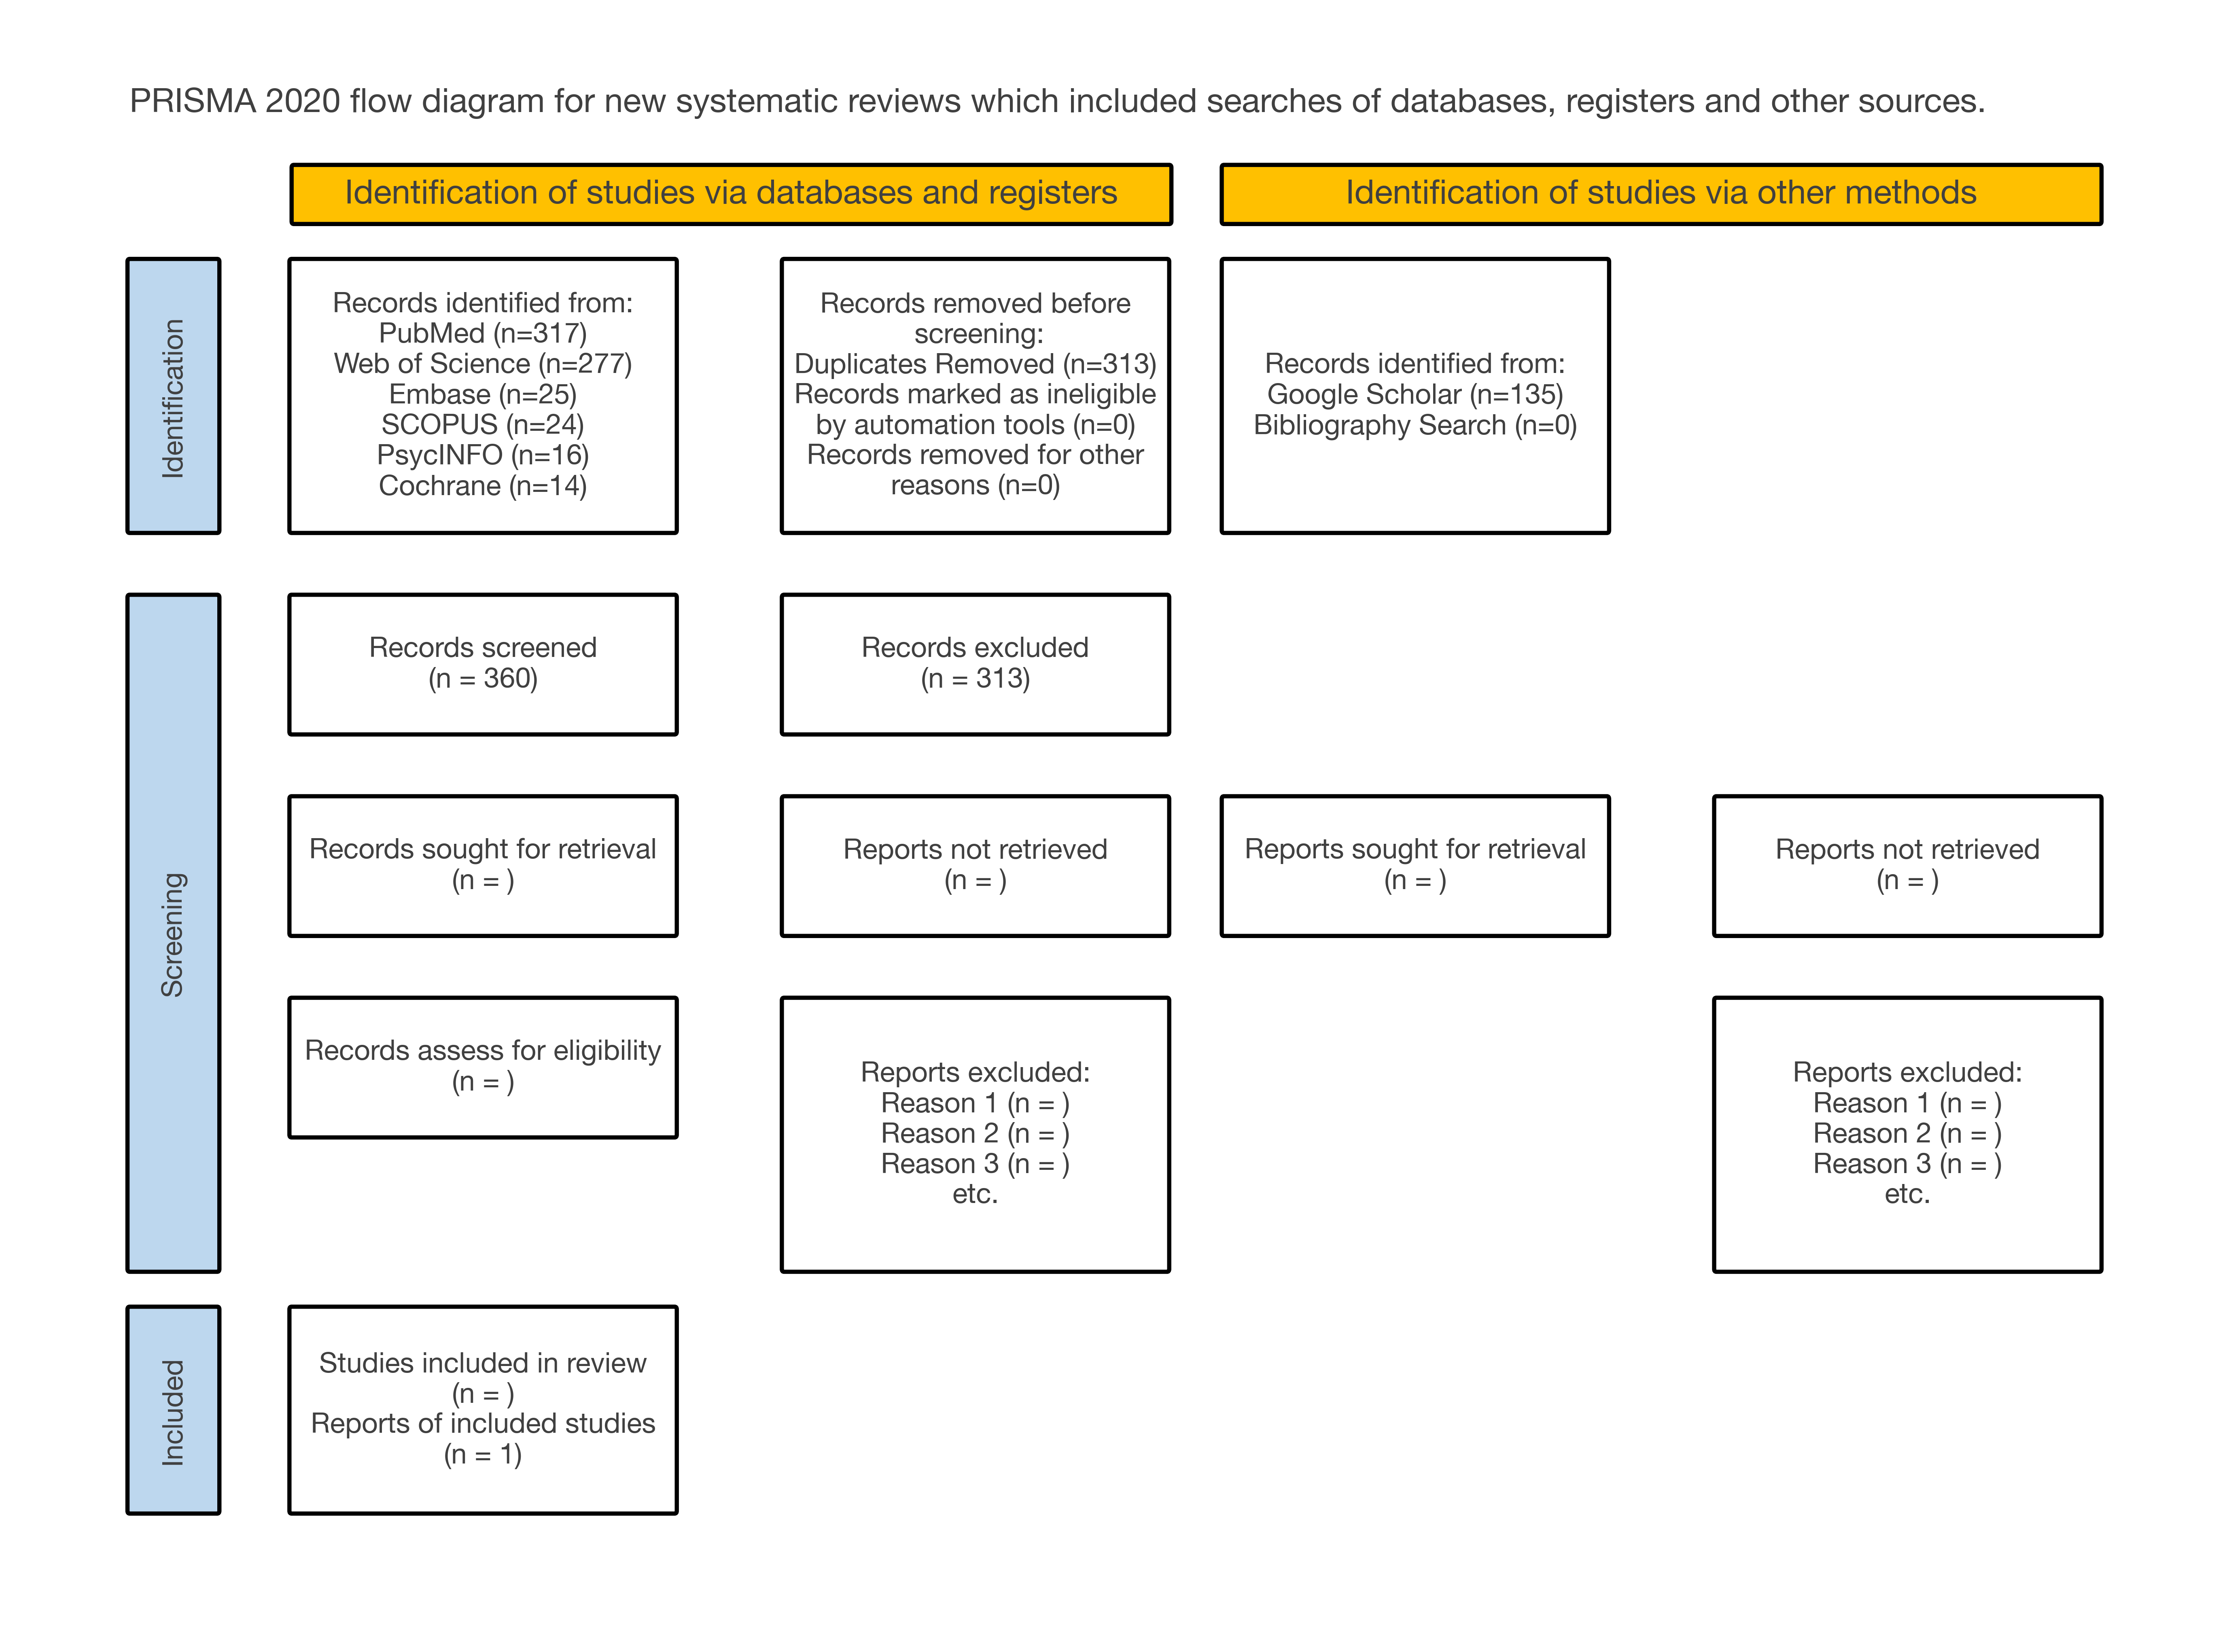

In [25]:
from matplotlib.patches import FancyBboxPatch, Rectangle, FancyArrow

# A4 landscape size
fig, ax = plt.subplots(figsize=(11.69, 8.27))
ax.axis('off')

# Set axis limits
ax.set_xlim(0, 20)
ax.set_ylim(0, 12)

# Draw title in top-left corner (using ax.text instead of suptitle)
ax.text(1, 11.5, 
        "PRISMA 2020 flow diagram for new systematic reviews which included searches of databases, registers and other sources.",
        fontsize=12, fontweight='bold', ha='left', va='top')

# Function to draw yellow header box
def draw_yellow_box(ax, x, y, width, height, text, fontsize=12):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#FFC000",
        linewidth=1.5
    )
    ax.add_patch(box)
    ax.text(
        x + width / 2, y + height / 2, text,
        ha='center', va='center',
        fontsize=fontsize, fontweight='bold'
    )

# Draw first yellow header box below the title
draw_yellow_box(ax, x=2.5, y=10.5, width=8, height=0.4, 
                text="Identification of studies via databases and registers")

# Draw second yellow box beside it
draw_yellow_box(ax, x=11, y=10.5, width=8, height=0.4,
                text="Identification of studies via other methods")

def draw_vertical_blue_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#BDD7EE",  # Light blue (similar to PRISMA)
        linewidth=1.5
    )
    ax.add_patch(box)
    
    # Rotated text (90 degrees, bottom to top)
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        rotation=90,  # rotate 90 degrees counterclockwise
        fontsize=fontsize, fontweight='bold'
    )

draw_vertical_blue_box(ax, x=1, y=8.2, width=0.8, height=2, text="Identification")
draw_vertical_blue_box(ax, x=1, y=2.7, width=0.8, height=5, text="Screening")
draw_vertical_blue_box(ax, x=1, y=0.9, width=0.8, height=1.5, text="Included")

def draw_white_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="white",
        linewidth=1.5
    )
    ax.add_patch(box)
    
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        fontsize=fontsize
    )

# Column 1
draw_white_box(ax, x=2.48, y=8.2, width=3.5, height=2, 
               text= "Records identified from:\n" + "\n".join(f"{db} (n={count})" for db, count in zip(database_counts_initial.index, database_counts_initial.values)))
draw_white_box(ax, x=2.48, y=6.7, width=3.5, height=1, 
               text=f"Records screened\n(n = {len(database_title_abstract_review)})")
draw_white_box(ax, x=2.48, y=5.2, width=3.5, height=1, 
               text="Records sought for retrieval\n(n = )")
draw_white_box(ax, x=2.48, y=3.7, width=3.5, height=1, 
               text="Records assess for eligibility\n(n = )")
draw_white_box(ax, x=2.48, y=0.9, width=3.5, height=1.5, 
               text="Studies included in review\n(n = )\n"
               "Reports of included studies\n(n = 1)")

# Column 2
draw_white_box(ax, x=6.98, y=8.2, width=3.5, height=2, 
               text="Records removed before\n screening:\n" + "\n".join(f"{db} (n={count})" for db, count in zip(database_pre_screen_removal_reasoning['Reason'], database_pre_screen_removal_reasoning['Count'])))
draw_white_box(ax, x=6.98, y=6.7, width=3.5, height=1, 
               text=f"Records excluded\n(n = {database_search_duplicate_count})")
draw_white_box(ax, x=6.98, y=5.2, width=3.5, height=1, 
               text="Reports not retrieved\n(n = )")
draw_white_box(ax, x=6.98, y=2.7, width=3.5, height=2, 
               text="Reports excluded:\n"
               "Reason 1 (n = )\n"
               "Reason 2 (n = )\n"
               "Reason 3 (n = )\n"
               "etc.")

# Column 3
draw_white_box(ax, x=11, y=8.2, width=3.5, height=2, 
               text="Records identified from:\n" + "\n".join(f"{db} (n={count})" for db, count in zip(other_methods_results_counts['Source'], other_methods_results_counts['Count'])))
draw_white_box(ax, x=11, y=5.2, width=3.5, height=1, 
               text="Reports sought for retrieval\n(n = )")

# Column 4
draw_white_box(ax, x=15.5, y=5.2, width=3.5, height=1, 
               text="Reports not retrieved\n(n = )")
draw_white_box(ax, x=15.5, y=2.7, width=3.5, height=2, 
               text="Reports excluded:\n"
               "Reason 1 (n = )\n"
               "Reason 2 (n = )\n"
               "Reason 3 (n = )\n"
               "etc.")


plt.tight_layout()
plt.show()